In [19]:
#Rocket Problem
G=6.67e-11
r_earth_moon=3.84e8 #m
m_earth=5.972e24 #kg
m_moon=7.348e22 #kg
r_earth=6380e3 + 5e4 #m
#r_moon=r_earth_moon-r_earth #m
r_moon = 1740e4 # moon's radius, meters
m_rocket=365.5 #kg
v0=14000 #m/s
k=0

In [21]:
#Force on Rocket
F_earth=-G*(m_earth*m_rocket)/(r_earth**2)
F_moon=G*(m_moon*m_rocket)/(r_earth_moon-r_moon)**2
F_net=F_earth+F_moon

print("Force on rocket by Earth: %.2e"%F_earth)
print("Force on rocket by Moon: %.2e"%F_moon)
print("Net force on rocket: %.2e"%F_net)

Force on rocket by Earth: -3.52e+03
Force on rocket by Moon: 1.33e-02
Net force on rocket: -3.52e+03


In [31]:
t=0
t_limit = 1000000
v=v0
v_s=[]
r_s=[]
Fn_s=[]
t_s=[]
dt=1.1
a1=-F_net/m_rocket
r1=r_earth
r2=r1 + v0*dt + 0.5*a1*dt*dt
while (
    r2<(r_earth_moon-r_moon) # not to the moon yet
    and t<t_limit # havn't run out of time
    and r2>r_earth # havn't fallen back past the surface of the earth
       ):
    F_e = (-G*(m_earth*m_rocket)/(r2**2))
    F_m =((G*m_moon*m_rocket)/(r_earth_moon-r2)**2)
    Fnet = F_e + F_m
    a2 = -Fnet/m_rocket
    #cool, I see Verlet!
    r3 = 2*r2 - r1 + a2*dt*dt
    v2 = (r3-r1)/(2*dt)
    v_s.append(v2)
    r_s.append(r2)
    Fn_s.append(Fnet)
    t_s.append(t)
    t = t + dt
    r1 = r2
    r2 = r3

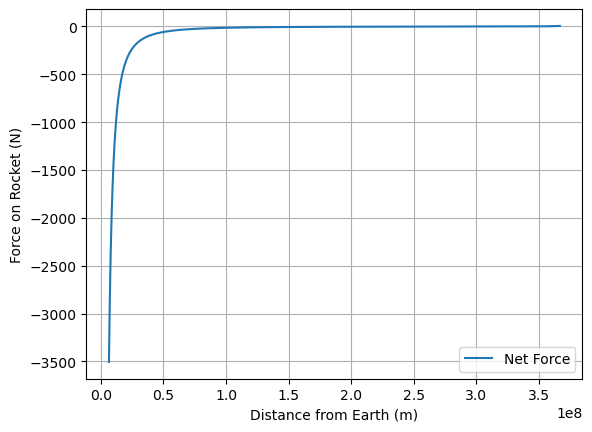

In [33]:
import matplotlib.pyplot as plt
plt.plot(r_s,Fn_s,label="Net Force")
plt.ylabel("Force on Rocket (N)")
plt.xlabel("Distance from Earth (m)")
plt.legend()
plt.grid()

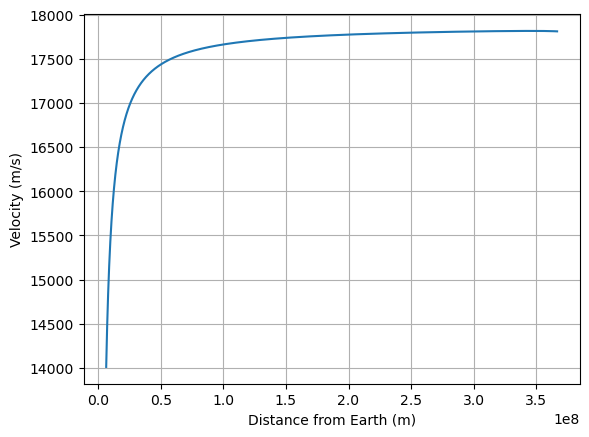

In [35]:
plt.plot(r_s,v_s,label="")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Distance from Earth (m)")
plt.grid()